In [52]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [53]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [55]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

Sepal Length vs Sepal Width (Setosa vs Versicolor)

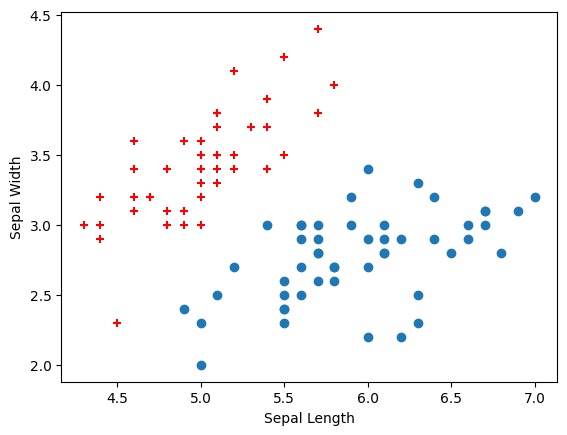

In [57]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color='red', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])

Petal Length vs Petal Width (Setosa vs Versicolor)

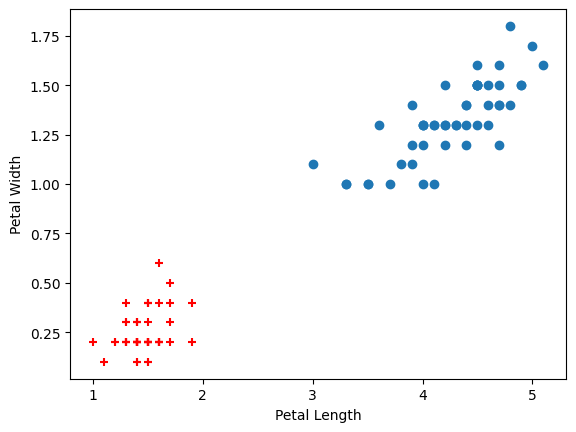

In [58]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'])

Train Test Split

In [59]:
X = df.drop('target', axis='columns')
y = df.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
knn.score(X_test, y_test)

0.9666666666666667

Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)

Text(58.222222222222214, 0.5, 'Truth')

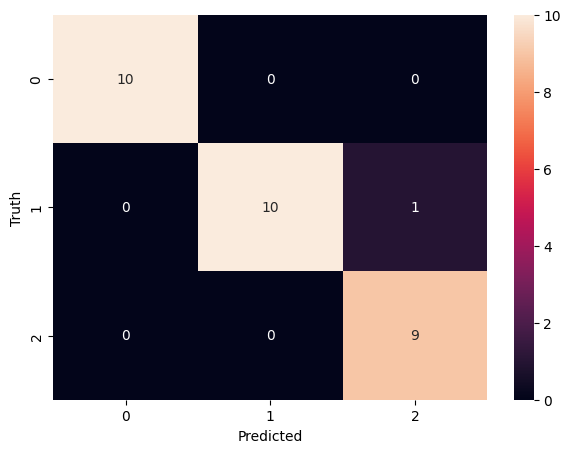

In [63]:
import seaborn as sns
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.91      0.95        11
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

